In [1]:
using StatsBase

In [2]:
pwd()

"/Users/lewis/code/nn by hand/notebooks"

In [3]:
cd("../chatgpt_conv_code")
pwd()

"/Users/lewis/code/nn by hand/chatgpt_conv_code"

In [4]:
includet("../chatgpt_conv_code/sample_code.jl")

In [5]:
using MLDatasets

In [6]:
trainset = MNIST(:train)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :train
  features  =>    28×28×60000 Array{Float32, 3}
  targets   =>    60000-element Vector{Int64}

In [7]:
testset = MNIST(:test)

dataset MNIST:
  metadata  =>    Dict{String, Any} with 3 entries
  split     =>    :test
  features  =>    28×28×10000 Array{Float32, 3}
  targets   =>    10000-element Vector{Int64}

In [8]:
batch_size = 10000
minibatch_size = 50
prediction_size = 50

50

In [9]:
x_train = trainset.features[1:28,1:28,1:batch_size];
x_train = Float64.(x_train)
x_train = reshape(x_train, 28,28,1,batch_size)
size(x_train)

(28, 28, 1, 10000)

In [10]:
y_train = trainset.targets[1:batch_size]
y_train = indicatormat(y_train)
y_train = Float64.(y_train);

In [11]:
# shuffle the variables and outcome identically
img_idx = shuffle(1:size(x_train,4));


In [12]:
# where will we find image 1 after shuffling?
pos1 = findall(x->x==1, img_idx)[1]

7178

In [13]:
x_train_shuf = x_train[:,:,:,img_idx];
y_train_shuf = y_train[:,img_idx];

In [14]:
x_train_shuf[:,:,:,pos1] == x_train[:,:,:, 1]

true

In [15]:
y_train_shuf[:,pos1] == y_train[:,1]

true

In [16]:
count(x->x==1.0,x_train[:,:,1,50])

3

In [17]:
digits = getvalidx(y_train_shuf)

10000-element Vector{Int64}:
  4
  9
  6
  7
  1
  7
  6
  7
  1
  3
  ⋮
  9
 10
  4
 10
  2
  8
  3
  7
  4

In [18]:
findall(digits .== 9)

944-element Vector{Int64}:
    2
   21
   22
   29
   33
   34
   35
   37
   48
   58
    ⋮
 9930
 9937
 9941
 9947
 9952
 9960
 9967
 9982
 9992

In [19]:
getvalidx(y_train_shuf[:,9955])

1-element Vector{Int64}:
 8

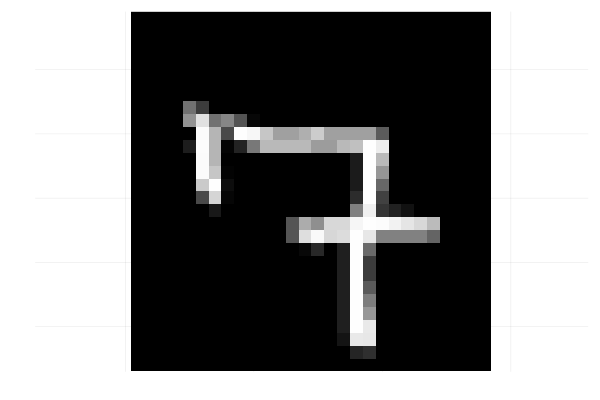

In [20]:

display_mnist_digit(x_train_shuf[:,:,:, 9955])

In [21]:
countmap(getvalidx(y_train_shuf))

Dict{Int64, Int64} with 10 entries:
  5  => 980
  4  => 1032
  6  => 863
  7  => 1014
  2  => 1127
  10 => 978
  9  => 944
  8  => 1070
  3  => 991
  1  => 1001

In [22]:
predictlayers = init_layers(28,28,1,n_samples=prediction_size)

scale_factor = 0.3333333333333333
scale_factor = 0.027777777777777776


LayerDefs(ConvLayer([-0.2097845397282482 -0.1797016576905717 -0.4962645312166686; 0.14534054917682807 0.4712949304749917 -0.8482939409663467; -0.18185838994589085 0.27524503192896077 -1.220711783910476;;;; 0.02527735435894241 0.25050412632748764 0.8355551033824538; -0.4765071245996046 -0.22830729850747758 -0.05373856285477063; 0.4851408050929267 0.29856565361163323 -0.734727621624394;;;; 0.5575244937022416 -0.8443440512983529 0.8731799328159261; -0.055761079028744304 0.751116268400012 0.37461316814617623; -0.79836613085538 1.3084372019358832 0.5195830894903669;;;; … ;;;; -0.8109791033023996 -0.4535991821641914 0.3216283074914613; -0.7128942044386622 -0.23561589322645335 -0.22600586882317306; -0.07234595195154428 -0.9969681447866366 -0.1447777990169911;;;; 0.5899590533462148 0.15179967190072904 0.41769253296735354; -0.0005425719554744286 -0.6126366208908363 0.49314975631309216; -0.8664735032964339 0.598377742076984 0.21258437351055676;;;; -0.026881971774367824 -0.08337724425406373 -0.17

In [23]:
trainlayers = init_layers(28,28,1, n_samples=minibatch_size)

scale_factor = 0.3333333333333333
scale_factor = 0.027777777777777776


LayerDefs(ConvLayer([-0.2097845397282482 -0.1797016576905717 -0.4962645312166686; 0.14534054917682807 0.4712949304749917 -0.8482939409663467; -0.18185838994589085 0.27524503192896077 -1.220711783910476;;;; 0.02527735435894241 0.25050412632748764 0.8355551033824538; -0.4765071245996046 -0.22830729850747758 -0.05373856285477063; 0.4851408050929267 0.29856565361163323 -0.734727621624394;;;; 0.5575244937022416 -0.8443440512983529 0.8731799328159261; -0.055761079028744304 0.751116268400012 0.37461316814617623; -0.79836613085538 1.3084372019358832 0.5195830894903669;;;; … ;;;; -0.8109791033023996 -0.4535991821641914 0.3216283074914613; -0.7128942044386622 -0.23561589322645335 -0.22600586882317306; -0.07234595195154428 -0.9969681447866366 -0.1447777990169911;;;; 0.5899590533462148 0.15179967190072904 0.41769253296735354; -0.0005425719554744286 -0.6126366208908363 0.49314975631309216; -0.8664735032964339 0.598377742076984 0.21258437351055676;;;; -0.026881971774367824 -0.08337724425406373 -0.17

In [24]:
train_loop!(trainlayers, predictlayers;
        x_train=x_train_shuf, y_train=y_train_shuf, batch_size=batch_size,epochs=10,
        minibatch_size = 50, lr=0.01)  # pool1 after conv2

mini_num = 200
n_samples = 50

epoch 1 batch 1 Loss = 3.504168521122907 Accuracy = 0.08


epoch 1 batch 1 Loss_pred = 3.504168521122907 Accuracy_pred = 0.08


epoch 1 batch 2 Loss = 4.22961903863323 Accuracy = 0.04


epoch 1 batch 2 Loss_pred = 4.046491112589327 Accuracy_pred = 0.1


epoch 1 batch 3 Loss = 3.986063666091701 Accuracy = 0.08


epoch 1 batch 3 Loss_pred = 4.1280159097009435 Accuracy_pred = 0.1


epoch 1 batch 4 Loss = 3.8102778265134916 Accuracy = 0.14


epoch 1 batch 4 Loss_pred = 3.9478291347461547 Accuracy_pred = 0.1


epoch 1 batch 5 Loss = 3.4896380175980246 Accuracy = 0.12


epoch 1 batch 5 Loss_pred = 4.309692560057474 Accuracy_pred = 0.06


epoch 1 batch 6 Loss = 3.6210272645378674 Accuracy = 0.06


epoch 1 batch 6 Loss_pred = 4.599528813379821 Accuracy_pred = 0.04


epoch 1 batch 7 Loss = 3.472384086957492 Accuracy = 0.1


epoch 1 batch 7 Loss_pred = 4.28268807711907 Accuracy_pred = 0.08


epoch 1 batch 8 Loss = 3.6101184875120818 Accuracy = 0.14


epoch 1 batch 